In [1]:
####### Question #######
'''
Q1. Train a PerceptronPerceptron is a fundamental building block for
neural networks. Let us try to train a single perceptron. Consider the
data given in the following table. As one can see, it has two attributes x1,x2
and a class label (either 0 or 1).1. Implement the perceptron training rule
and get the appropriate parameters fora single perceptron.2. Plot the
data points and the obtained decision boundary.3. Also draw the
schematic diagram of the trained perceptron with learned weights. You
can draw this on paper and attach a photo.

'''


########Load Libraries#######

import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler # using standard scaler as data for most features is normally distributed
from tqdm import tqdm 
from math import sqrt 
from time import gmtime, strftime
import random
import sklearn.datasets as dtset

%matplotlib inline

######## Capture the start time to check the runt ime of the whole notebook #########
startTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())

C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\jaghos\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:

####################################
#   Create Class and fetch Data    #
####################################

######## Assign Data ########

X1 = [-3.98,-3.464,-3.461,-2.22,-2.02,-2.01,-1.42,-1.416,-1.09,-0.19,0.01,0.03,0.04,0.06,0.07,0.12,1.11,1.411,1.414,1.86,1.96,2.11,3.461,3.464,4.12]
X2 = [-0.12,-2.11,1.89,-3.474,0.03,3.459,-1.409,1.419,0.08,-4.13,1.02,-2.12,2.06,3.97,0.1,-1.12,0.09,1.419,-1.415,3.47,-0.12,-3.472,-1.87,2.07,0.09]
X = np.array(list(zip(X1,X2)))
print(X.shape)
y = [1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1]

class Perceptron(object):
    
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(x))
                self.weights[1:] += update * x
                self.weights[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
            return self
        
    def net_input(self, X):
        z = np.dot(X, self.weights[1:]) + self.weights[0]
        return z
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)
    





(25, 2)


weights of the trained perceptron:
 [ 0.51624345  0.55678244 -0.07408172]


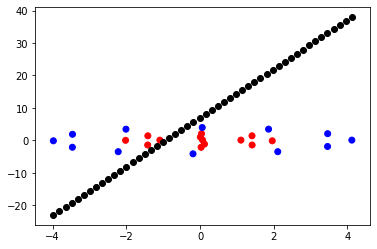

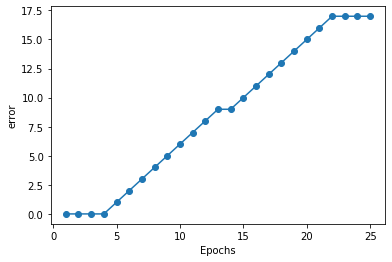

In [3]:
##############################################################
#            Call the fit and predict function               #
##############################################################
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X, y)
print("weights of the trained perceptron:\n",per.weights) ######### print the weights #########

# Here i am calculating slope and intercept with given three weights

for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
    slope = -(per.weights[0]/per.weights[2])/(per.weights[0]/per.weights[1])  
    intercept = -per.weights[0]/per.weights[2]

    #y =mx+c, m is slope and c is intercept
    lin = (slope*i) + intercept
    plt.plot(i, lin,'ko') ####### plot the decison boundary #######

############### Define the colours of points ################
cols=[]
for l in y:
    if l==0:
        cols.append('red')
    elif l==1:
        cols.append('blue')
        
############### Print Plots ###############
    
plt.scatter(X[:50, 0], X[:50, 1],
            color=cols, marker='o', label='pointers')

plt.show()
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('error')
plt.show()

# Q2. Train a Neural NetworkLet us design a neural network to classify
flowers from Iris dataset.
1. Implement a single hidden layer MLP. Final output layer will have 3
neurons,one for each result. Arch: [Input, hidden, output]
2. Now use an NN with two hidden layers. The first hidden layer has 8
neurons.The second hidden layer has 4 neurons. The third hidden layer
has 4 neurons . Arch: [Input,hidden1,hidden2,hidden3,output]
(i) Use keras or any other framework to design the NN model and train on
the iris data.
(ii) Draw the schematic diagram of the NN along with all the weights and
specify a suitable activation function. How many trainable parameters are
there?

In [4]:
#######################Load IRIS Data Set#############################

iris = dtset.load_iris() 
X = iris.data 
y = iris.target 
names = iris.target_names

print("Dataset X\n",X)
print("Dataset y\n",y)
print("Dataset Names\n",names)

Dataset X
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 

In [5]:
###############Import DNN libraries ################
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

Using TensorFlow backend.


In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from keras.utils import to_categorical
y_binary_train = to_categorical(y_train)
y_binary_test = to_categorical(y_test)

# Implement a single hidden layer MLP. Final output layer will have 3 neurons,one for each result. Arch: [Input, hidden, output]

In [7]:
############# Create Model Architecture ###############

model = Sequential()
model.add(Dense(64, activation='relu' , input_shape = (X_train.shape[1],))) #### Input layer
model.add(Dense(16, activation='relu')) #### Hidden layer 1 
model.add(Dense(3,activation='softmax')) #### output layer

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


Train on 120 samples, validate on 30 samples
Epoch 1/30
 - 1s - loss: 0.9727 - accuracy: 0.5083 - val_loss: 0.9414 - val_accuracy: 0.5667
Epoch 2/30
 - 0s - loss: 0.7780 - accuracy: 0.8000 - val_loss: 0.8531 - val_accuracy: 0.5667
Epoch 3/30
 - 0s - loss: 0.6606 - accuracy: 0.7833 - val_loss: 0.6434 - val_accuracy: 0.9333
Epoch 4/30
 - 0s - loss: 0.5480 - accuracy: 0.8167 - val_loss: 0.5929 - val_accuracy: 0.7000
Epoch 5/30
 - 0s - loss: 0.4705 - accuracy: 0.9333 - val_loss: 0.5483 - val_accuracy: 0.6667
Epoch 6/30
 - 0s - loss: 0.4309 - accuracy: 0.8833 - val_loss: 0.5218 - val_accuracy: 0.6667
Epoch 7/30
 - 0s - loss: 0.3503 - accuracy: 0.9167 - val_loss: 0.3746 - val_accuracy: 0.9333
Epoch 8/30
 - 0s - loss: 0.3037 - accuracy: 0.9750 - val_loss: 0.4022 - val_accuracy: 0.8000
Epoch 9/30
 - 0s - loss: 0.2631 - accuracy: 0.9667 - val_loss: 0.3112 - val_accuracy: 0.9333
Epoch 10/30
 - 0s - loss: 0.2410 - accuracy: 0.9667 - val_loss: 0.2730 - val_accuracy: 0.9333
Epoch 11/30
 - 0s - loss

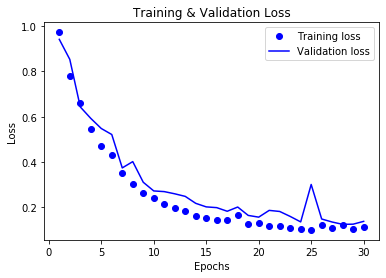

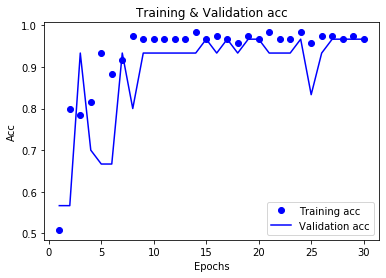

In [8]:
################### Train Model and plot ############################

history = model.fit(X_train, y_binary_train,
          batch_size=5,
          epochs=30,
          verbose=2,
          validation_data=(X_test, y_binary_test))




# Plot the loss chart



plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title ('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# PLot the accuracy chart

plt.clf() # clear the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title ('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

2. Now use an NN with two hidden layers. The first hidden layer has 8
neurons.The second hidden layer has 4 neurons. The third hidden layer
has 4 neurons . Arch: [Input,hidden1,hidden2,hidden3,output]


In [9]:
########################### Create 2nd NN Model ############################


model = Sequential()
model.add(Dense(64, activation='relu' , input_shape = (X_train.shape[1],))) #Input layer
model.add(Dense(8, activation='relu')) # hidden layer 1
model.add(Dense(4, activation='relu')) # hidden layer 2
model.add(Dense(4, activation='relu')) # hidden layer 3
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 520       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 15        
Total params: 911
Trainable params: 911
Non-trainable params: 0
_________________________________________________________________


Train on 120 samples, validate on 30 samples
Epoch 1/50
 - 1s - loss: 2.1562 - accuracy: 0.3250 - val_loss: 1.1420 - val_accuracy: 0.3667
Epoch 2/50
 - 0s - loss: 1.1327 - accuracy: 0.3083 - val_loss: 1.0823 - val_accuracy: 0.6667
Epoch 3/50
 - 0s - loss: 1.0702 - accuracy: 0.6500 - val_loss: 1.0450 - val_accuracy: 0.5000
Epoch 4/50
 - 0s - loss: 1.0301 - accuracy: 0.6333 - val_loss: 0.9756 - val_accuracy: 0.3667
Epoch 5/50
 - 0s - loss: 0.9564 - accuracy: 0.6167 - val_loss: 0.8879 - val_accuracy: 0.5667
Epoch 6/50
 - 0s - loss: 0.8877 - accuracy: 0.6667 - val_loss: 0.8197 - val_accuracy: 0.6000
Epoch 7/50
 - 0s - loss: 0.8333 - accuracy: 0.7500 - val_loss: 0.7741 - val_accuracy: 0.6000
Epoch 8/50
 - 0s - loss: 0.7968 - accuracy: 0.7250 - val_loss: 0.7358 - val_accuracy: 0.7000
Epoch 9/50
 - 0s - loss: 0.7651 - accuracy: 0.7667 - val_loss: 0.7135 - val_accuracy: 0.6000
Epoch 10/50
 - 0s - loss: 0.7424 - accuracy: 0.7583 - val_loss: 0.6972 - val_accuracy: 0.6667
Epoch 11/50
 - 0s - loss

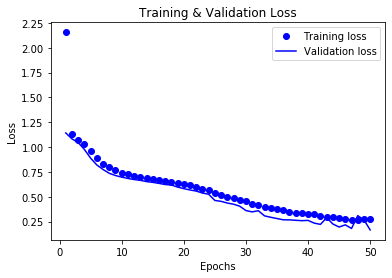

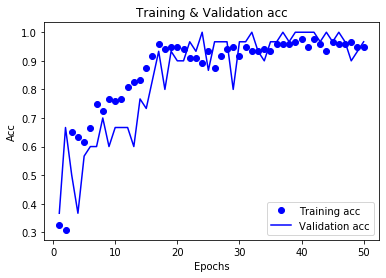

In [10]:
################### Train Model and plot ############################

history = model.fit(X_train, y_binary_train,
          batch_size=5,
          epochs=50,
          verbose=2,
          validation_data=(X_test, y_binary_test))




# Plot the loss chart



plt.clf()
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss)+1)
plt.plot(epochs , loss , 'bo' , label = 'Training loss')
plt.plot(epochs , val_loss , 'b' , label = 'Validation loss')
plt.title ('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# PLot the accuracy chart

plt.clf() # clear the figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1,len(acc)+1)
plt.plot(epochs , acc , 'bo' , label = 'Training acc')
plt.plot(epochs , val_acc , 'b' , label = 'Validation acc')
plt.title ('Training & Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [11]:
############ weights and visualization #################

count = 1
for layer in model.layers:
    print("\nweights of layer:",count)
    weights = layer.get_weights() # list of numpy arrays
    print("\n",weights)
    count = count+1

from ann_visualizer.visualize import ann_viz;

ann_viz(model, title="Assignment network")


weights of layer: 1

 [array([[-1.03784740e-01, -2.12240219e-02, -2.04178929e-01,
        -2.15526342e-01,  1.10706985e-01,  1.15425579e-01,
        -4.21503782e-02,  1.65807471e-01,  2.99148381e-01,
         7.82562792e-02, -2.67705947e-01,  1.65763959e-01,
         7.59578049e-02,  1.10941865e-01, -1.96674183e-01,
         3.30775157e-02,  1.20213114e-01, -2.85801530e-01,
         3.17921966e-01,  2.60604173e-01,  3.16243201e-01,
         1.44266039e-01,  1.09037504e-01, -1.62854642e-01,
         9.72881615e-02,  2.29489923e-01, -9.24194008e-02,
         1.34946644e-01, -1.73858687e-01, -3.57180648e-02,
         1.67458445e-01,  1.18435517e-01, -9.60943922e-02,
         1.93562835e-01,  6.60930797e-02, -1.51377276e-01,
        -1.79741174e-01,  5.57496548e-02, -1.88418850e-01,
         1.18444361e-01,  1.92558452e-01, -5.33649465e-03,
        -2.36465096e-01,  9.38746408e-02,  1.59352124e-01,
        -1.50081888e-01, -9.68828797e-02, -2.90760338e-01,
        -1.37944892e-01,  2.0427

        0.        ,  0.01743642,  0.12687671], dtype=float32)]

weights of layer: 3

 [array([[ 0.6243572 , -0.6179622 , -0.535144  ,  0.20744422],
       [ 0.49489313, -0.5388824 , -0.55004907,  0.4971417 ],
       [ 0.04205383, -0.08530677,  1.1094918 ,  0.21633823],
       [ 0.45479077,  0.43515426, -0.02171677, -0.25872248],
       [-0.23285392,  0.03679907, -0.18172425,  0.3097703 ],
       [ 0.5782849 ,  0.66317135,  0.12508732, -0.17051822],
       [ 0.4925885 ,  0.3682294 , -0.43515733,  0.43152413],
       [ 0.95010436, -0.3743079 ,  0.86583585,  0.04375144]],
      dtype=float32), array([-0.18462484, -0.0285283 ,  0.00974663, -0.29405043], dtype=float32)]

weights of layer: 4

 [array([[ 0.29985166,  0.8937478 ,  0.74627256,  0.6644725 ],
       [-0.32913843,  0.36776763,  0.02410655, -0.3406928 ],
       [ 0.90633893, -0.26548138, -0.04085725, -0.1543374 ],
       [-0.22197658, -0.0136846 ,  0.71476406,  0.41378814]],
      dtype=float32), array([-0.01205804, -0.23319589, -0

In [12]:
####################### No of trainable Parameters and suitable activation function ################################

######################## In this case considering the input layer and output layer , the number of trainable parameters are 
######################## 911 and RELU is a suitable activation function as it gives a non linear output ##################
######################## Schematic diagram is attached but havent been able to draw the weights as it will be too messy
######################## I have printed the weights layer wise to show the values since i couldnt draw them in the schematic

In [13]:
#############################################################################################
#                                    Overall Run time                                       #
#############################################################################################

endTime = strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime())
print ("Run started at : ",startTime)
print ("Run ended at : ",endTime)

Run started at :  Sun, 01 Aug 2021 08:50:25 +0000
Run ended at :  Sun, 01 Aug 2021 08:51:13 +0000
